# Preparing Data for Modelling
### Machine Learning & Data Science

## Imputing

In [88]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [102]:
titanic = sns.load_dataset('titanic')

In [119]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [103]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [141]:
age_simple = SimpleImputer(strategy="mean").fit_transform(titanic[['age']])

titanic_full = titanic.copy()
titanic_full['age'] = age_simple

In [149]:
titanic['age'].mean()

29.69911764705882

In [158]:
close2mean = np.abs(titanic['age'] - titanic['age'].mean()) < 0.1

titanic.loc[close2mean, 'age'].size

0

In [159]:
close2mean = np.abs(age_simple - titanic['age'].mean()) < 0.1

age_simple[close2mean].size

177

In [142]:
titanic_full.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [143]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))


[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


In [170]:
age_iter = IterativeImputer().fit_transform(titanic[['age', 'survived', 'pclass']])[:, 0 ]

In [171]:
(age_iter - age_simple).mean()

-0.40715002620482343

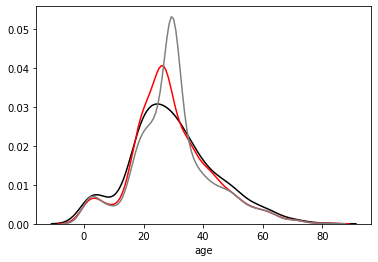

In [177]:
sns.distplot(titanic.loc[ ~titanic['age'].isna(), 'age'], color="black", hist=False)
sns.distplot(age_iter, color="red", hist=False)
sns.distplot(age_simple, color="grey", hist=False);

#### Aside: KNN Imputing

In [178]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

----

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('bank.csv', delimiter=';')

In [5]:
features = ['age', 'balance', 'day']

X = df[features].values
y = df[ 'y' ].values

In [242]:
def score(model, X, y, report_classes=None):
    Xtr, Xte, ytr, yte = train_test_split(X, y)
    model = model().fit(Xtr, ytr)
    
    if report_classes is not None:
        print(classification_report(yte, model.predict(Xte), target_names=report_classes))
              
    return (model, model.score(Xte, yte))

In [7]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split

In [8]:
X.shape

(4521, 3)

In [9]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

KNN(21).fit(X_tr, y_tr).score(X_te, y_te)

0.8620689655172413

# Transformation

In [10]:
from sklearn import preprocessing as pre

for X:

* standardscalar
    * normalizer
* onehotencoder
    * KBins
* ordinalencoder

for y:
* labelencoder


SimpleImputer
IterativeImputer

In [11]:
[n for n in dir(pre) if n[0].isupper()]

['Binarizer',
 'FunctionTransformer',
 'KBinsDiscretizer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MaxAbsScaler',
 'MinMaxScaler',
 'MultiLabelBinarizer',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'PolynomialFeatures',
 'PowerTransformer',
 'QuantileTransformer',
 'RobustScaler',
 'StandardScaler']

In [16]:
target = df['y']
features = df.drop(columns=['y'])
features_num = features.select_dtypes(np.int64)
features_cat = features.select_dtypes(np.object)

In [ ]:
y = target.values

In [17]:
scale = pre.StandardScaler().fit(features_num)

In [18]:
X_num = scale.transform(features_num)

In [19]:
ohc = pre.OneHotEncoder(sparse=False).fit(features_cat)

In [20]:
X_cat = ohc.transform(features_cat)

In [21]:
X = np.c_[X_num, X_cat]

In [22]:
X[0, :]

array([-1.05626965,  0.12107186,  0.37405206, -0.7118608 , -0.57682947,
       -0.4072183 , -0.32041282,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ])

In [23]:
yenc = pre.LabelEncoder().fit(target)

In [24]:
y = yenc.transform(target)
np.unique(y)

array([0, 1])

In [25]:
X.shape

(4521, 51)

In [107]:
from sklearn.decomposition import PCA

ev = PCA(X.shape[1]).fit(X).explained_variance_ratio_.cumsum()

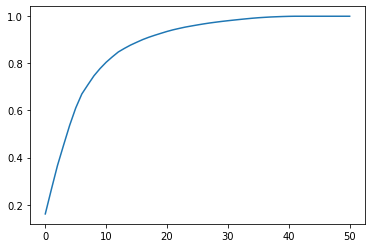

In [108]:
sns.lineplot(range(X.shape[1]), ev);

In [109]:
n_90 = np.argmin(ev < 0.9)
n_90, ev[n_90]

(16, 0.9009210437200232)

In [110]:
pca = PCA(n_90).fit(X)
X_pca = pca.transform(X)

In [77]:
from sklearn.linear_model import LogisticRegression

In [80]:
from sklearn.model_selection import cross_validate

In [113]:
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y)

KNN(21).fit(X_tr, y_tr).score(X_te, y_te)

0.8956675508399646

In [114]:
from sklearn.neural_network import MLPRegressor

In [116]:
models = [KNN(3), LogisticRegression(), MLPRegressor()]

cv = {m : cross_validate(m, X_pca, y, cv=5) for m in models}

In [117]:
for m, v in cv.items():
    print(type(m).__name__, v['test_score'].mean())

KNeighborsClassifier 0.881222314574879
LogisticRegression 0.8907341221336722
MLPRegressor 0.013720032680666261


In [118]:
X.shape

(4521, 51)

In [240]:
score(MLPRegressor, X, y)[1]

-0.03791159483387441

In [239]:
score(LogisticRegression, X, y)[1]

0.8947833775419982

In [121]:
model = LogisticRegression().fit(X, y)

In [122]:
yhat = model.predict(X)

In [169]:
np.unique(yhat, return_counts=True), np.unique(y, return_counts=True)

((array([0, 1]), array([4263,  258])), (array([0, 1]), array([4000,  521])))

In [128]:
_, (hat_yes, hat_no) = np.unique(yhat, return_counts=True)
_, (yes, no) =  np.unique(y, return_counts=True)

print(yes/len(y))
print(hat_yes / len(y))

0.8847600088476001
0.9429329794293297


In [40]:
kbin = pre.KBinsDiscretizer(n_bins=5, encode='ordinal').fit(features_num)

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


In [41]:
X_binned = kbin.transform(features_num)

In [42]:
X_binned[0, :]

array([0., 3., 3., 0., 0., 0., 0.])

In [43]:
X_binned.shape, features_num.shape

((4521, 7), (4521, 7))

In [44]:
ordenc = pre.OrdinalEncoder().fit(features_cat)
X_ordcat = ordenc.transform(features_cat)

In [45]:
X_ordcat.shape, features_cat.shape

((4521, 9), (4521, 9))

In [46]:
X_ranked = np.c_[X_ordcat, X_binned]
X_ohbin = np.c_[X_cat, X_binned]

In [47]:
from sklearn.tree import DecisionTreeRegressor as DT

score(DT, X_ranked, y)[1]

-0.5362236436863306

In [48]:
score(DT, X_ohbin, y)[1]

-0.5137978887978893

In [49]:
from sklearn.ensemble import RandomForestClassifier as RF

score(RF, X_ohbin, y)[1]

0.883289124668435

In [50]:
tree, tscore = score(RF, X_ranked, y)
tscore

0.8806366047745358

In [51]:
tree.feature_importances_

array([0.10423811, 0.05025742, 0.0583761 , 0.00527503, 0.03183864,
       0.0179226 , 0.03087636, 0.14025022, 0.06736506, 0.08687143,
       0.08751398, 0.09347259, 0.16956834, 0.05617412, 0.        ,
       0.        ])

In [52]:
feature_names = np.r_[features_cat.columns, features_num.columns]

In [53]:
X_ranked.shape[1], len(tree.feature_importances_), len(feature_names)

(16, 16, 16)

In [54]:
np.argsort(tree.feature_importances_)

array([14, 15,  3,  5,  6,  4,  1, 13,  2,  8,  9, 10, 11,  0,  7, 12])

In [55]:
features_ranked = list(zip(feature_names, np.argsort(tree.feature_importances_)))

In [56]:
sorted(features_ranked, key=lambda r: r[1])

[('campaign', 0),
 ('contact', 1),
 ('poutcome', 2),
 ('education', 3),
 ('loan', 4),
 ('default', 5),
 ('housing', 6),
 ('pdays', 7),
 ('age', 8),
 ('balance', 9),
 ('day', 10),
 ('duration', 11),
 ('previous', 12),
 ('month', 13),
 ('job', 14),
 ('marital', 15)]

In [57]:
from sklearn.feature_selection import SelectKBest

In [58]:
X.shape

(4521, 51)

In [62]:
X_ranked[0,:]

array([10.,  1.,  0.,  0.,  0.,  0.,  0., 10.,  3.,  0.,  3.,  3.,  0.,
        0.,  0.,  0.])

In [63]:
select = SelectKBest().fit(X_ranked[:, :14], y)

In [64]:
X_10best = select.transform(X[:, :14])

In [65]:
X_10best.shape

(4521, 10)

In [66]:
np.argsort(select.scores_)

array([ 3,  9, 11,  1,  0,  7,  2, 13,  5, 10,  8,  4,  6, 12])

In [69]:
features_selected = list(zip(feature_names, np.argsort(select.scores_)))

In [73]:
sorted(features_selected, key=lambda r: r[1])

[('housing', 0),
 ('default', 1),
 ('contact', 2),
 ('job', 3),
 ('day', 4),
 ('poutcome', 5),
 ('duration', 6),
 ('loan', 7),
 ('balance', 8),
 ('marital', 9),
 ('age', 10),
 ('education', 11),
 ('campaign', 12),
 ('month', 13)]

In [74]:
sorted(features_ranked, key=lambda r: -r[1])

[('marital', 15),
 ('job', 14),
 ('month', 13),
 ('previous', 12),
 ('duration', 11),
 ('day', 10),
 ('balance', 9),
 ('age', 8),
 ('pdays', 7),
 ('housing', 6),
 ('default', 5),
 ('loan', 4),
 ('education', 3),
 ('poutcome', 2),
 ('contact', 1),
 ('campaign', 0)]

## Column Transfomers

In [86]:
column_trans = ColumnTransformer(
    [('city_category', OneHotEncoder(dtype='int'),['city']),
     ('title_bow', CountVectorizer(), 'title')],
    remainder='drop')

column_trans.fit(X)




column_trans.get_feature_names()

NameError: name 'ColumnTransformer' is not defined

In [87]:
ct = ColumnTransformer([
      ('scale', StandardScaler(),
      make_column_selector(dtype_include=np.number)),
      ('onehot',
      OneHotEncoder(),
      make_column_selector(pattern='city', dtype_include=object))])
ct.fit_transform(X)


NameError: name 'ColumnTransformer' is not defined

## Pipelines for Modelling

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="300"/>

In [78]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [('SelectKBest', SelectKBest()), 
     ('LogisticRegression', LogisticRegression())])

pipeline.fit(X, y)
pipeline.score(X, y)


0.902676399026764

In [83]:
cross_validate(pipeline, X, y)['test_score'].mean()

0.9015723854691243

## Custom Pipelines
#### for Cleaning and ETL

http://archive.ics.uci.edu/ml/datasets/Adult

In [182]:
cnames = [ 
    'age', 'workclass', 'fnlwgt', 
    'education', 'education-num',
    'marital-status', 'occupation',
    'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 
    'income'
]

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/' + 'adult.data', names=cnames)

In [183]:
df.sample(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
6334,36,Private,297449,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,40,United-States,>50K
326,23,?,211601,Assoc-voc,11,Never-married,?,Own-child,Black,Female,0,0,15,United-States,<=50K


In [184]:
features = df.drop('income', axis=1)
target = df['income']

features.shape, target.shape

((32561, 14), (32561,))

## Data Preparation: Sketching

In [185]:
features = features.replace({' ?': np.nan})
features.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

In [186]:
features.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

## Defining the Pipeline 

In [204]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import * 

class ToNaN(TransformerMixin):
    def fit(self, X): return self
    
    def transform(self, X):
        return X.replace({' ?': np.nan})

In [200]:
class ToCleaned(TransformerMixin):
    def fit(self, X): return self
    
    def transform(self, X):
        return X.dropna(axis=0)

In [237]:
class ToEncoded(TransformerMixin):
    def fit(self, X):
        categorical = X.select_dtypes(np.object).columns
        self.encoders = { c: OneHotEncoder(sparse=False).fit(X[[c]]) for c in categorical }
        return self
    
    def transform(self, X):
        for c in self.encoders:
            X[c] = self.encoders[c].transform(X[[c]])
        
        return X

In [238]:
class ToSelected(TransformerMixin):
    def fit(self, X): return self
    
    def transform(self, X):
        return X.drop(['workclass', 'occupation', 'native-country', 'capital-gain'], axis=1)

## Preparation and Modelling

In [239]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

adult_pipeline = Pipeline([
    ('SelectFeatures', ToSelected()),
    ('ReplaceNaN', ToNaN()),
    ('RemoveNaN', ToCleaned()),
    ('EncodeCategorical', ToEncoded()),
])

lenc = LabelEncoder().fit(target)

X = adult_pipeline.fit_transform(features).values
y = lenc.transform(target)

print(y[0])

X[0, :]

0


array([3.9000e+01, 7.7516e+04, 0.0000e+00, 1.3000e+01, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+01])

In [244]:
score(LogisticRegression, X, y, lenc.classes_);

              precision    recall  f1-score   support

       <=50K       0.77      0.98      0.86      6163
        >50K       0.54      0.07      0.12      1978

    accuracy                           0.76      8141
   macro avg       0.65      0.52      0.49      8141
weighted avg       0.71      0.76      0.68      8141



In [245]:
score(RandomForestClassifier, X, y, lenc.classes_);

NameError: name 'RandomForestClassifier' is not defined